In [22]:
# standard libs
import os
import sys
import logging

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'src')
sys.path.append(PROJECT_SRC_PATH)

import visualizations
from prediction_age import AgePredictor
from preprocessing import *

# external libs
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier, XGBRFClassifier

In [2]:
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO)

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [4]:
path_data_france = os.path.join('..', 'data', 'france-cities-200.csv')
data_france = pd.read_csv(path_data_france)

In [5]:
data_france_sample = data_france.sample(frac=.1)

## Data Preparation

2022-01-17 12:24:30,744 | INFO : Dataset length: 209774
2022-01-17 12:24:30,946 | INFO : Test dataset length: 41955
2022-01-17 12:24:30,947 | INFO : Training dataset length: 167819
2022-01-17 12:24:30,948 | INFO : Standard deviation of test set: 80.72990418665636
2022-01-17 12:24:31,085 | INFO : Test dataset length after preprocessing: 11728
2022-01-17 12:24:31,086 | INFO : Training dataset length after preprocessing: 46609


MAE: 16.50960287846127 y
RMSE: 22.140309725190562 y
R2: 0.2926282522258028


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


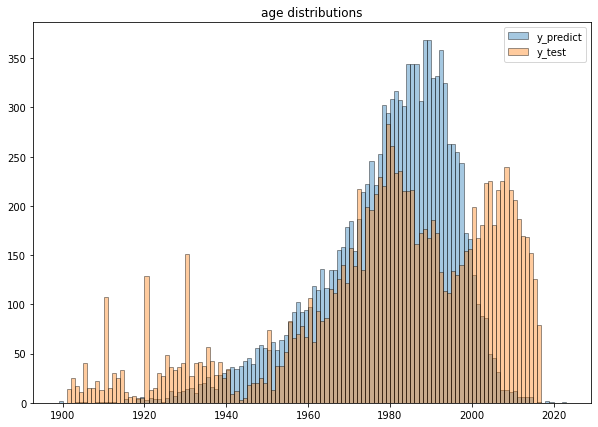

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

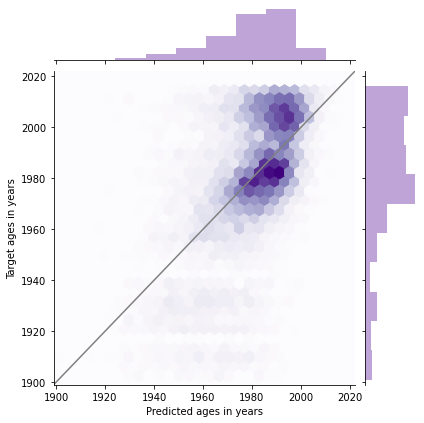

In [23]:
predictor_80_20 = AgePredictor(
    model=XGBRegressor(),
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers]
)
predictor_80_20.evaluate_regression()

In [26]:
print(predictor_80_20.X_train['Phi'].describe())
print(predictor_80_20.X_test['Phi'].describe())

count    46609.000000
mean         0.494202
std          0.101108
min          0.003453
25%          0.432691
50%          0.510270
75%          0.575268
max          0.980166
Name: Phi, dtype: float64
count    11728.000000
mean         0.495498
std          0.100556
min          0.035629
25%          0.435286
50%          0.511561
75%          0.575175
max          0.910693
Name: Phi, dtype: float64


2022-01-17 12:38:09,696 | INFO : Dataset length: 209774
2022-01-17 12:38:09,999 | INFO : Test dataset length: 41955
2022-01-17 12:38:09,999 | INFO : Training dataset length: 167819
2022-01-17 12:38:10,001 | INFO : Standard deviation of test set: 80.72990418665636
2022-01-17 12:38:10,373 | INFO : Test dataset length after preprocessing: 11728
2022-01-17 12:38:10,374 | INFO : Training dataset length after preprocessing: 46609


MAE: 16.508966495362994 y
RMSE: 22.13921774460715 y
R2: 0.29269802696470903


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


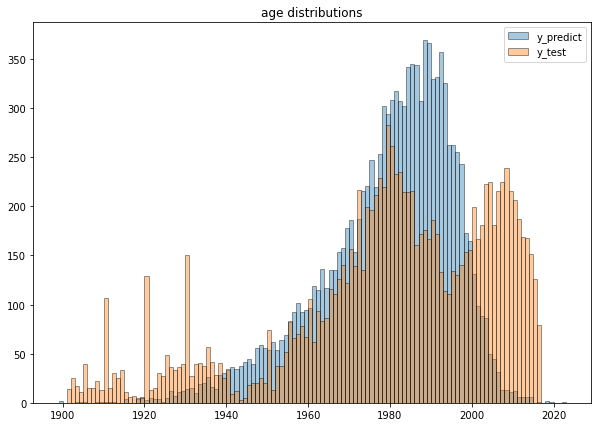

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

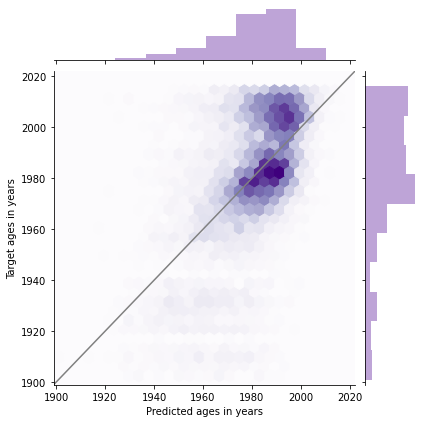

In [29]:
predictor_normalized = AgePredictor(
    model=XGBRegressor(),
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers, normalize_features]
)
predictor_normalized.evaluate_regression()

In [30]:
print(predictor_normalized.X_train['Phi'].describe())
print(predictor_normalized.X_test['Phi'].describe())

count    46609.000000
mean         0.502450
std          0.103519
min          0.000000
25%          0.439472
50%          0.518901
75%          0.585449
max          1.000000
Name: Phi, dtype: float64
count    11728.000000
mean         0.503777
std          0.102954
min          0.032943
25%          0.442129
50%          0.520222
75%          0.585353
max          0.928871
Name: Phi, dtype: float64


In [17]:
normalize_features(data_france_sample)['Phi'].describe()

count    209774.000000
mean          0.470504
std           0.123194
min           0.000000
25%           0.391552
50%           0.495655
75%           0.571124
max           1.000000
Name: Phi, dtype: float64